In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_excel('D:\ANGELO\Documents\dataset_rumah_cleaned.xlsx')
df

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
0,Joglo,Jakarta Barat,2000000000,3.0,2.0,72,90,yes,no,yes,no,no
1,Cempaka Putih,Jakarta Pusat,1130000000,2.0,2.0,30,58,no,no,yes,no,no
2,Kelapa Gading,Jakarta Utara,1040000000,2.0,2.0,55,54,no,no,yes,no,no
3,Daan Mogot,Jakarta Barat,3950000000,4.0,2.0,120,135,no,no,yes,no,no
4,Jagakarsa,Jakarta Selatan,2500000000,5.0,6.0,83,200,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,Jatibening,Bekasi,810000000,2.0,1.0,120,90,no,no,no,no,no
1997,Jati Asih,Bekasi,1610000000,2.0,1.0,72,45,yes,no,no,no,no
1998,Jati Asih,Bekasi,1180000000,3.0,2.0,120,90,yes,no,no,no,no
1999,Harapan Indah,Bekasi,910000000,4.0,2.0,105,78,no,no,no,no,no


# Problem
## Bussiness Understanding

Tujuan kita membuat project ini adalah untuk memprediksi harga atau rumah berdasarkan fasilitas yang terdapat pada atau rumah tersebut. serta mengembangkan model prediksi harga rumah di daerah jabodetabek berdasarkan fasilitas yang di miliki oleh rumah.

pembeli atau konsumen biasanya melihat lihat rumah yang memiliki harga yang terjangkau dengan fasilitas yang memadai, karena itu mereka membeli rumah secara objektiv. karena hal itu kami membuat model ini untuk mempermudah proses pencarian dan menghemat waktu para pembeli untuk membeli rumah. harapan kami adalah para pencari rumah bisa menggunakan model ini sebagai panduan mengidentifikasi properti atau rumah berdasarkan fasilitas dan harga yang mereka inginkan.


## Data Understanding

1. **Lokasi** = wilayah tempat properti/rumah berada.disini formatnya kelurahan/kecamatan,kota
2. **Harga** = Harga properti/rumah
3. **Kamar Tidur** = Jumlah Kamar Tidur yang ada pada properti/rumah
4. **Kamar Mandi** = Jumlah Kamar Mandi yang ada pada properti/rumah
5. **Luas Tanah** = Luas tanah pada rumah adalah ukuran tanah yang tertutup oleh bangunan. Luas tanah dapat dihitung dengan mengalikan panjang dan lebar tanah
6. **Luas Bangunan** = Luas bangunan adalah ukuran bangunan yang berdiri di atas tanah.
7. **Fasilitas** = Fasilitas: Keberadaan fasilitas seperti taman, AC, jalur telepon, kolam renang, CCTV, dsb. jika fasilitas tersebut ada akan di tampilkan dengan 'yes' dan jika tidak akan di tampilkan 'no' pada kolom fasilitas masing masing.

12. **Date** = kolom date adalah kolom tanggal. yang berisi tanggal data ini di dapat


## Data Prep

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            2001 non-null   object 
 1   kota              2001 non-null   object 
 2   harga             2001 non-null   int64  
 3   K_tidur           1978 non-null   float64
 4   K_mandi           1974 non-null   float64
 5   luas_tanah_m2     2001 non-null   int64  
 6   luas_bangunan_m2  2001 non-null   int64  
 7   taman             2001 non-null   object 
 8   AC                2001 non-null   object 
 9   jalur_telepon     2001 non-null   object 
 10  kolam_renang      2001 non-null   object 
 11  CCTV              2001 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 187.7+ KB


In [4]:
df.describe()

,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2
count,2.001000e+03,1978.000000,1974.000000,2001.000000,2001.000000
mean,3.165037e+09,3.107179,2.409828,152.703148,151.423288
std,7.709931e+09,1.409786,1.804349,230.424504,181.703826
min,1.450000e+08,1.000000,1.000000,18.000000,11.000000
25%,8.600000e+08,2.000000,1.000000,75.000000,64.000000
50%,1.360000e+09,3.000000,2.000000,102.000000,100.000000
75%,2.490000e+09,4.000000,3.000000,145.000000,160.000000
max,1.490000e+11,20.000000,40.000000,4600.000000,2600.000000


In [5]:
df.isnull().sum()

lokasi               0
kota                 0
harga                0
K_tidur             23
K_mandi             27
luas_tanah_m2        0
luas_bangunan_m2     0
taman                0
AC                   0
jalur_telepon        0
kolam_renang         0
CCTV                 0
dtype: int64

In [6]:
df['K_tidur'].isnull().sum()
df['K_mandi'].isnull().sum()

27

In [7]:
df['K_tidur'] = df['K_tidur'].fillna(df['K_tidur'].mode().iloc[0])
df['K_mandi'] = df['K_mandi'].fillna(df['K_mandi'].mode().iloc[0])

df.isnull().sum()

lokasi              0
kota                0
harga               0
K_tidur             0
K_mandi             0
luas_tanah_m2       0
luas_bangunan_m2    0
taman               0
AC                  0
jalur_telepon       0
kolam_renang        0
CCTV                0
dtype: int64

### Sebaran Harga Rumah

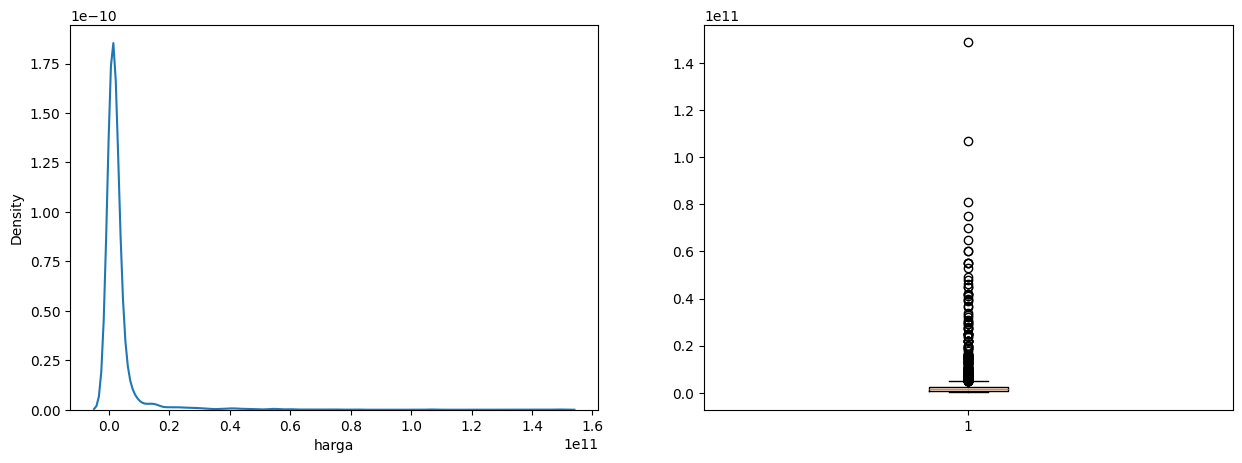

In [8]:
# harga rumah
# sebaran harga rumah
f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.kdeplot(df['harga'])

f.add_subplot(1,2,2)
plt.boxplot(df["harga"])
plt.show()

### Kamar Tidur

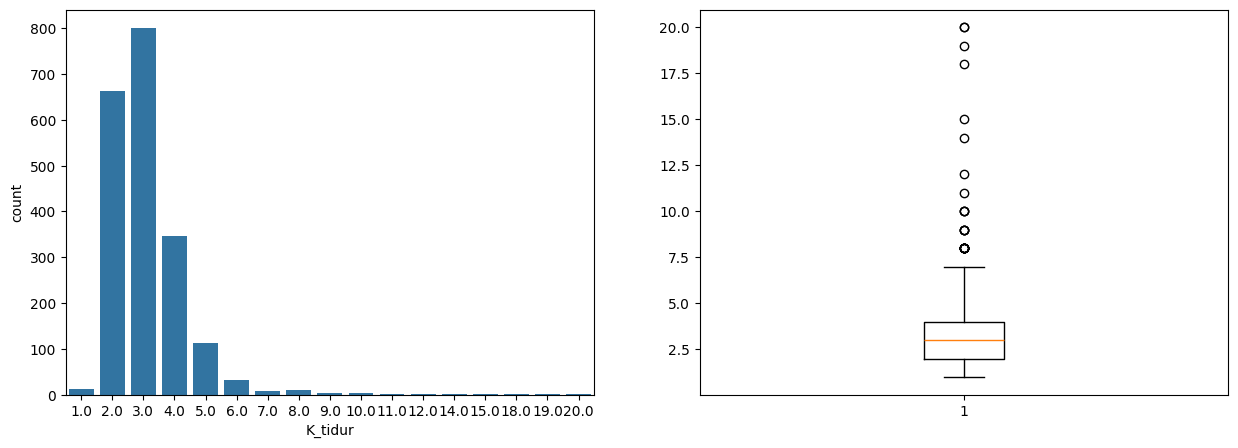

In [9]:
# jumlah kamar tidur
f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.countplot(data=df, x='K_tidur')

f.add_subplot(1,2,2)
plt.boxplot(df["K_tidur"])
plt.show()

In [10]:
df[df['K_tidur'] > 10]

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
1067,Cikarang,Bekasi,1500000000,15.0,15.0,135,250,no,no,no,no,no
1257,Tanjung Priok,Jakarta Utara,1000000000,14.0,14.0,252,115,no,no,no,no,no
1298,Kalideres,Jakarta Barat,1700000000,19.0,19.0,200,400,no,no,yes,no,no
1306,Pasar Minggu,Jakarta Selatan,6000000000,20.0,21.0,438,438,yes,no,yes,no,no
1399,Mangga Besar,Jakarta Barat,2000000000,11.0,2.0,156,120,no,no,no,no,no
1571,Cibinong,Bogor,2500000000,20.0,20.0,600,600,no,no,yes,no,no
1623,Beji,Depok,3550000000,18.0,18.0,126,313,yes,no,no,no,no
1672,Beji,Depok,2600000000,12.0,4.0,312,420,no,no,no,no,no


Menurut saya adanya kamar tidur yang melebihi 10 masih masuk akal. karena bisa saja properti atau rumah yang di jual sudah berbentuk kontrakan di tanah yang sama atau kos kosan dengan model rumah bertingkat.

In [11]:
# kamar tidur vs harga

fig = px.scatter(df, x="K_tidur", y="harga",
                 title="Korelasi Antara Jumlah Kamar Tidur & Harga Rumah",
                 color="harga"
                )
fig.show()


In [12]:
# bandingkan kamar tidur dengan luas bangunan

fig = px.scatter(df, x="K_tidur", y="luas_bangunan_m2",
                 title="Korelasi Antara Jumlah Kamar Tidur & Luas Bangunan",
                 color="luas_bangunan_m2"
                 )
fig.show()

### Kamar Mandi

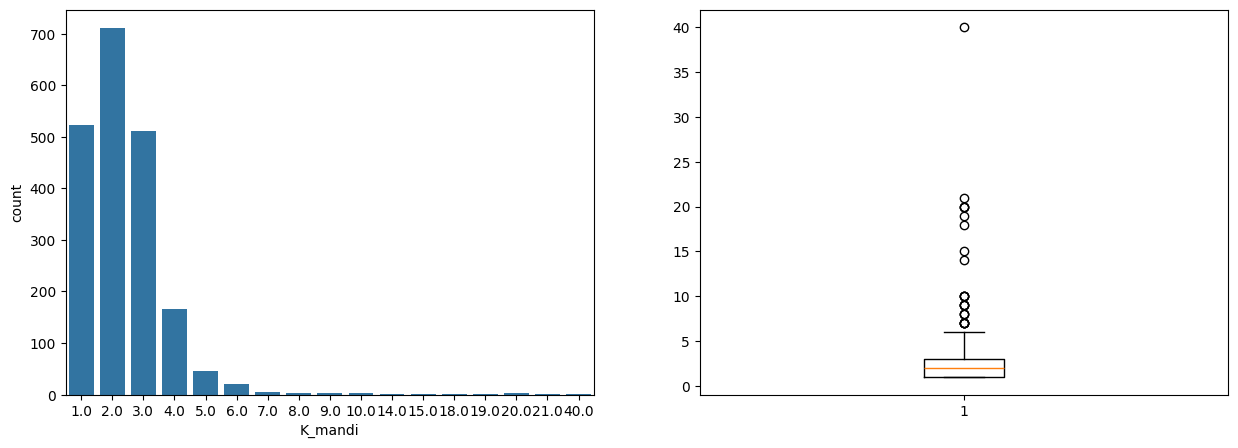

In [13]:
# jumlah kamar mandi
f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.countplot(data=df, x='K_mandi')

f.add_subplot(1,2,2)
plt.boxplot(df["K_mandi"])
plt.show()

In [14]:
df[df['K_mandi'] > 10]

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
431,Cilodong,Depok,1820000000,4.0,20.0,124,39,no,no,no,no,no
897,Gading Serpong,Tangerang,2090000000,4.0,40.0,128,120,no,no,no,no,no
1067,Cikarang,Bekasi,1500000000,15.0,15.0,135,250,no,no,no,no,no
1257,Tanjung Priok,Jakarta Utara,1000000000,14.0,14.0,252,115,no,no,no,no,no
1298,Kalideres,Jakarta Barat,1700000000,19.0,19.0,200,400,no,no,yes,no,no
1306,Pasar Minggu,Jakarta Selatan,6000000000,20.0,21.0,438,438,yes,no,yes,no,no
1571,Cibinong,Bogor,2500000000,20.0,20.0,600,600,no,no,yes,no,no
1623,Beji,Depok,3550000000,18.0,18.0,126,313,yes,no,no,no,no
1634,Cilodong,Depok,1820000000,4.0,20.0,124,39,no,no,no,no,no


bisa di lihat pada data ke 431, 897, 1634 kamar mandi memiliki jumlah yang tidak masuk akal untuk suatu rumah dengan luas bangunan 39 meter persegi.

In [15]:
treat_outlier_kmandi = df['K_mandi'].mode().iloc[0]

# update value kamar mandi yang outlier

df.at[431, 'K_mandi'] = treat_outlier_kmandi
df.at[1634, 'K_mandi'] = treat_outlier_kmandi
df.at[897, 'K_mandi'] = treat_outlier_kmandi

df[df['K_mandi'] > 10]

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
1067,Cikarang,Bekasi,1500000000,15.0,15.0,135,250,no,no,no,no,no
1257,Tanjung Priok,Jakarta Utara,1000000000,14.0,14.0,252,115,no,no,no,no,no
1298,Kalideres,Jakarta Barat,1700000000,19.0,19.0,200,400,no,no,yes,no,no
1306,Pasar Minggu,Jakarta Selatan,6000000000,20.0,21.0,438,438,yes,no,yes,no,no
1571,Cibinong,Bogor,2500000000,20.0,20.0,600,600,no,no,yes,no,no
1623,Beji,Depok,3550000000,18.0,18.0,126,313,yes,no,no,no,no


In [16]:
df.at[431, 'K_mandi']
df.at[897, 'K_mandi']
df.at[1634, 'K_mandi']

2.0

semuanya sudah di ganti ke jumlah kamar mandi yang paling sering muncul pada data yang ada.

Berdasarkan penelusuran pada web site properti atau rumah yang memiliki kamar tidur dan kamar mandi diatas 10 biasanya di jadikan kontrakan dalam satu tahah dan bertingkat, atau di jadikan sebagai kos kosan atau apart kos.

jadi jumlah kamar mandi dan kamar tidur yang melebihi 15 masih bisa di bilang masuk akal.

### Luas Bangunan

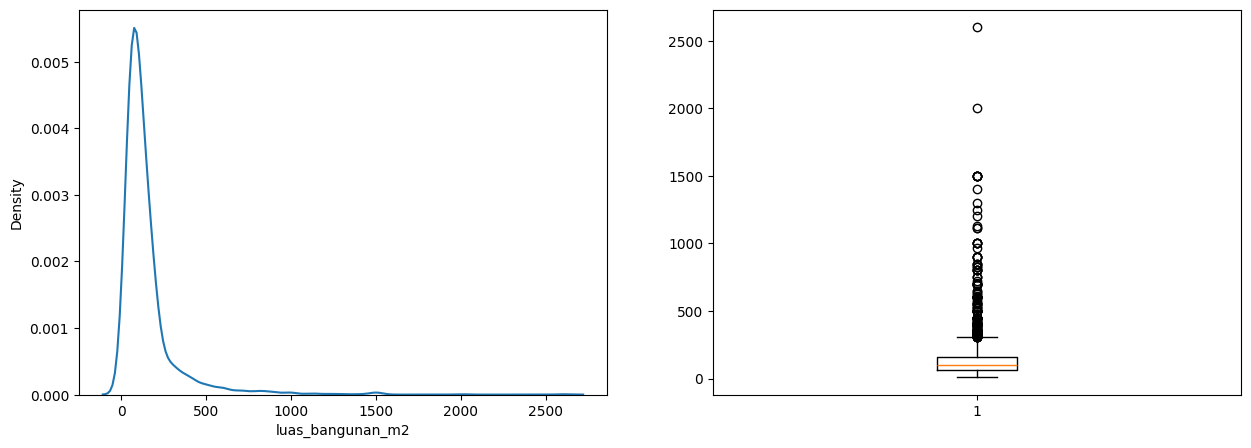

In [17]:
# luas bangunan
# sebaran luas bangunan
f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.kdeplot(df['luas_bangunan_m2'])

f.add_subplot(1,2,2)
plt.boxplot(df["luas_bangunan_m2"])
plt.show()

kebanyakan rumah memiliki luas di bawah 500 meter persegi

In [18]:
# luas bangunan vs harga 
fig = px.scatter(df, x="luas_bangunan_m2", y="harga",
                 title="Korelasi Antara Jumlah Luas Bangunan & Harga Rumah",
                color="harga"
                )
fig.show()

In [19]:
df[df['luas_bangunan_m2'] > 500]


,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
946,Jatibening,Bekasi,5500000000,5.0,5.0,720,609,no,no,no,no,yes
982,Jatibening,Bekasi,12200000000,5.0,4.0,2448,800,no,no,no,yes,no
1055,Jati Asih,Bekasi,25000000000,6.0,4.0,2500,1000,no,no,yes,no,no
1072,Cibubur,Bekasi,8000000000,6.0,5.0,400,700,no,no,no,yes,no
1123,Pondokmelati,Bekasi,4340000000,4.0,2.0,475,626,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1785,Modernland,Tangerang,6500000000,6.0,6.0,300,580,no,yes,no,no,no
1806,Alam Sutera,Tangerang,23500000000,5.0,6.0,416,568,no,no,no,no,yes
1808,BSD City,Tangerang,31000000000,4.0,3.0,1485,838,yes,no,no,no,no
1841,BSD City,Tangerang,16500000000,7.0,7.0,708,968,no,no,yes,no,no


In [20]:
df[df['luas_bangunan_m2'] > 1000]


,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
1194,Pondok Indah,Jakarta Selatan,65000000000,8.0,5.0,825,1500,yes,no,no,yes,no
1197,Pantai Mutiara,Jakarta Utara,41900000000,4.0,4.0,609,1500,yes,no,no,yes,no
1198,Pantai Mutiara,Jakarta Utara,41900000000,4.0,4.0,609,1500,yes,no,no,yes,no
1199,Kebayoran Baru,Jakarta Selatan,149000000000,6.0,5.0,1280,2000,no,no,yes,yes,no
1210,Ancol,Jakarta Utara,30000000000,8.0,8.0,600,1200,no,no,no,no,no
1224,Pantai Indah Kapuk,Jakarta Utara,60000000000,4.0,9.0,600,1300,no,no,no,yes,no
1250,Pantai Indah Kapuk,Jakarta Utara,36500000000,5.0,5.0,585,1400,no,no,yes,no,no
1295,Intercon,Jakarta Barat,27000000000,4.0,4.0,800,1500,yes,no,no,no,no
1327,TB Simatupang,Jakarta Selatan,70000000000,9.0,8.0,4600,2600,yes,no,yes,no,no
1353,Pondok Indah,Jakarta Selatan,55000000000,6.0,6.0,759,1115,no,no,yes,no,no


rumah dengan luas bangunan di atas 500 meter persegi memiliki harga yang terbilang tinggi di mana kebanyakan rumah yang luas bangunannya diatas 500 meter persegi pada data ini memiliki harga di atas 5 miliar. jadi masih masuk akal rumah itu ada, dan berdasarkan penulusuran di website rumah yang di jual dengan luas bangunan yang sangat amat besar dan luas itu adalah rumah mewah.

In [21]:
df[df['luas_bangunan_m2'] < 30]


,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
223,Cibinong,Bogor,500000000,2.0,1.0,60,21,no,no,no,no,no
638,Beji,Depok,2240000000,3.0,4.0,105,11,yes,no,no,no,no
1030,Serang Cibarusah,Bekasi,300000000,2.0,1.0,60,29,no,no,no,no,no
1168,Cibitung,Bekasi,250000000,1.0,1.0,84,21,no,no,yes,no,no
1558,Cibinong,Bogor,500000000,2.0,1.0,60,21,no,no,no,no,no
1955,Grand Wisata,Bekasi,540000000,2.0,1.0,72,25,yes,no,no,no,no


seperti yang bisa dilihat ada data yang bisa di bilang outlier yaitu pada line 638. mari ganti data luas bangunan tsb dengan median luas bangunan.

In [22]:
median_value = df['luas_bangunan_m2'].median()
median_value

100.0

In [23]:
treat_outlier_luasbangunan = df['luas_bangunan_m2'].median()

# update value kamar mandi yang outlier

df.at[638, 'luas_bangunan_m2'] = treat_outlier_luasbangunan




In [24]:
df[df['luas_bangunan_m2'] < 30]

,lokasi,kota,harga,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV
223,Cibinong,Bogor,500000000,2.0,1.0,60,21,no,no,no,no,no
1030,Serang Cibarusah,Bekasi,300000000,2.0,1.0,60,29,no,no,no,no,no
1168,Cibitung,Bekasi,250000000,1.0,1.0,84,21,no,no,yes,no,no
1558,Cibinong,Bogor,500000000,2.0,1.0,60,21,no,no,no,no,no
1955,Grand Wisata,Bekasi,540000000,2.0,1.0,72,25,yes,no,no,no,no


### Luas Tanah

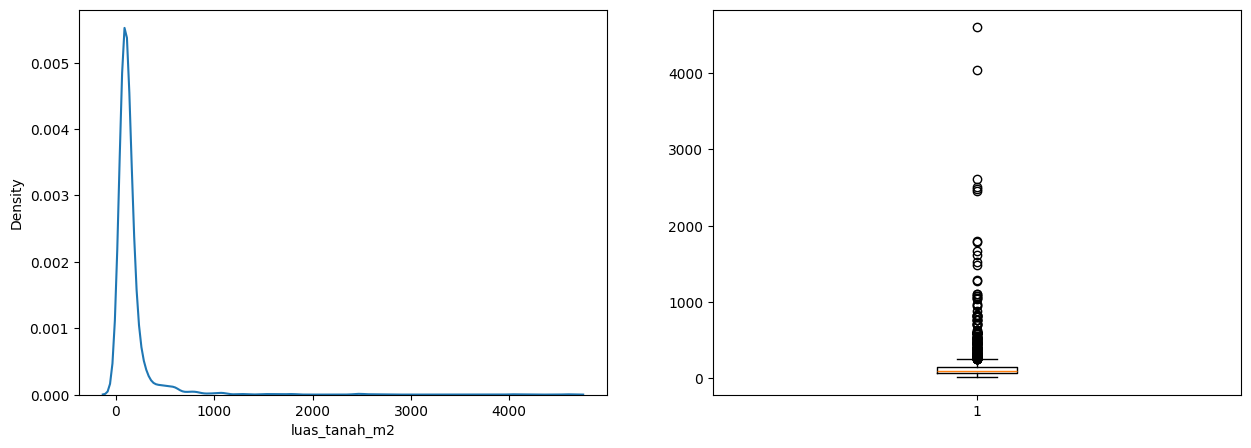

In [25]:
# luas lahan
# sebaran luas lahan
f = plt.figure(figsize=(15,5))

f.add_subplot(1,2,1)
sns.kdeplot(df['luas_tanah_m2'])

f.add_subplot(1,2,2)
plt.boxplot(df["luas_tanah_m2"])
plt.show()

In [26]:
# luas tanah vs harga vs luas bangunan
fig = px.scatter(df, x="luas_bangunan_m2", y="luas_tanah_m2",
                 title="Korelasi Antara Jumlah Luas Bangunan & Harga Rumah",
                color="harga"
                )
fig.show()

In [27]:
# luas tanah vs harga vs luas bangunan
fig = px.scatter(df, x="luas_bangunan_m2", y="luas_tanah_m2",
                 title="Korelasi Antara Jumlah Luas Bangunan & Harga Rumah",
                color="luas_tanah_m2"
                )
fig.show()

karena tadi sudah di cek yang memiliki luas bangunan di atas 500 meter persegi berharga di atas 5 miliah dan juga masih masuk akal. lalu untuk properti yang memiliki luas bangunan dan luas tanah di atas 1000 meter persegi biasanya adalah apartkos, kontrakan dalam satu tanah, atau rumah mewah.

### Fasilitas lain (AC, Kolam Renang, Taman, CCTV, Jalur Telepon)

In [28]:
fitur_lain = ['CCTV', 'taman', 'jalur_telepon', 'AC', 'kolam_renang']
for col in fitur_lain:
    print(col)
    print(df[col].value_counts())
    print('------')

CCTV
CCTV
no     1937
yes      64
Name: count, dtype: int64
------
taman
taman
no     1072
yes     929
Name: count, dtype: int64
------
jalur_telepon
jalur_telepon
no     1468
yes     533
Name: count, dtype: int64
------
AC
AC
no     1922
yes      79
Name: count, dtype: int64
------
kolam_renang
kolam_renang
no     1938
yes      63
Name: count, dtype: int64
------


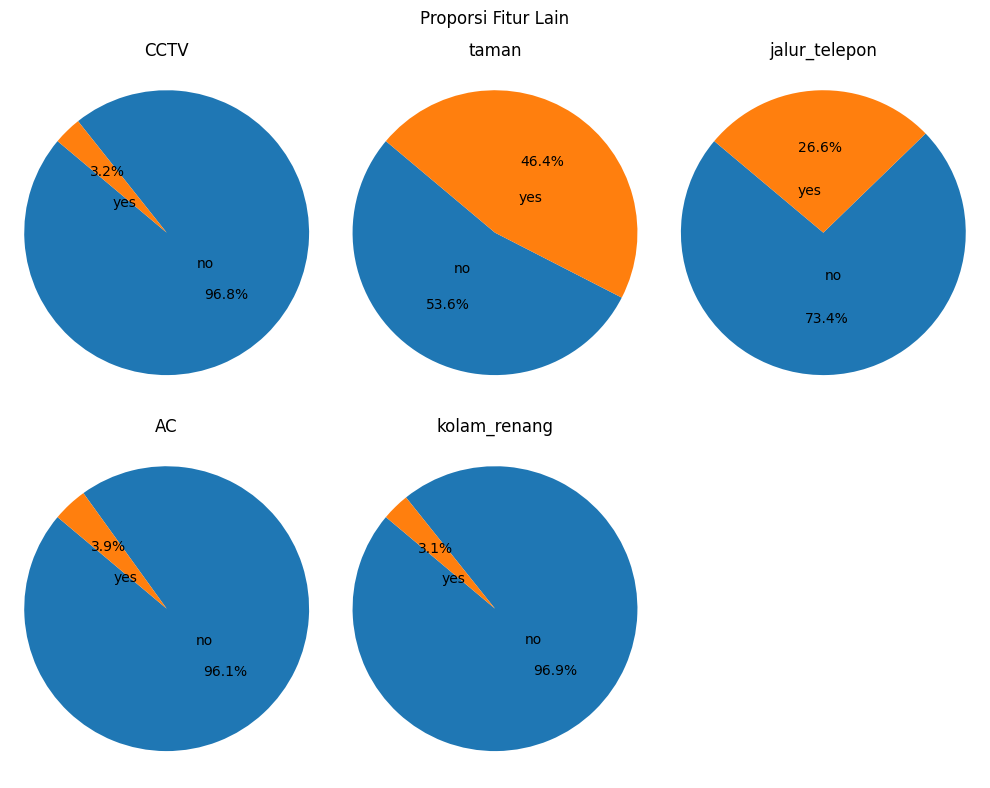

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Proporsi Fitur Lain')

axes = axes.flatten()

for i, column in enumerate(df[fitur_lain]):
    ax = axes[i]
    category_counts = df[column].value_counts()
    
    ax.pie(category_counts, 
           labels=category_counts.index, 
           autopct='%1.1f%%', 
           startangle=140,
           labeldistance=0.3)
    
    ax.set_title(f'{column}')
    ax.axis('equal')

if len(df[fitur_lain]) % 2 == 1:
    axes[-1].axis('off')

plt.tight_layout()
# plt.savefig('asset/fitur_lain.png', dpi=2000, bbox_inches = 'tight')
plt.show()

berdasarkan pie chart di atas, kebanyakan rumah memiliki fasilitas taman, dan jalur telepon. sedangkan 3 sisanya yaitu CCTV, kolam renang, dan AC bukan fasilitas yang datang dengan rumah layaknya fasilitas taman dan jalur telepon.

### Rumah dengan Rata-rata Harga Termahal

In [30]:
# daerah dengan rata-rata harga rumah termahal
loc_mean = df.groupby("kota")["harga"].mean().reset_index().sort_values(by='harga', ascending=True)
loc_median= df.groupby("kota")["harga"].median().reset_index().sort_values(by='harga', ascending=True)

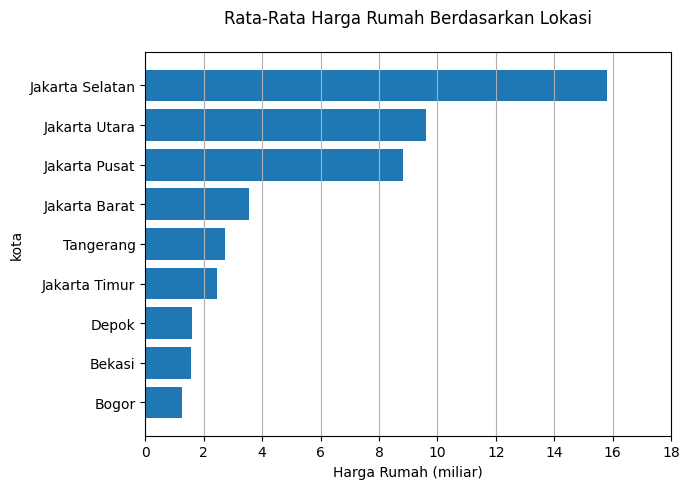

In [31]:
plt.figure(figsize=(7,5))
plt.barh(loc_mean['kota'], loc_mean['harga'])
plt.title('Rata-Rata Harga Rumah Berdasarkan Lokasi\n')
plt.xlabel('Harga Rumah (miliar)')
plt.ylabel('kota')
plt.grid(axis='x')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000000).astype(int))

# plt.savefig('asset/rata2_harga_lokasi.png', dpi=2000, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

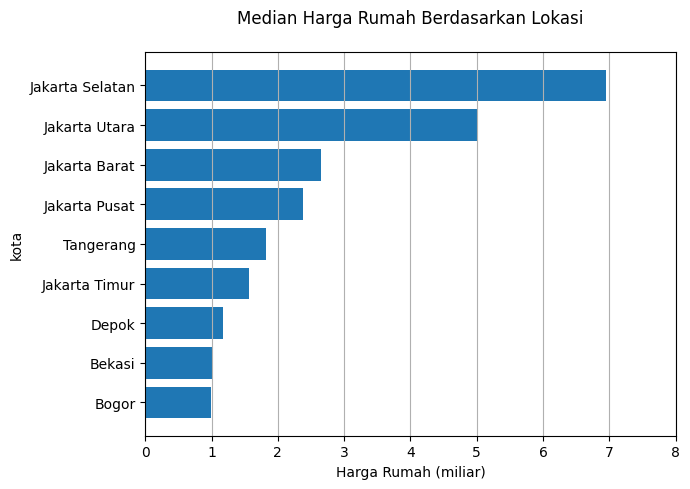

In [32]:
plt.figure(figsize=(7,5))
plt.barh(loc_median['kota'], loc_median['harga'])
plt.title('Median Harga Rumah Berdasarkan Lokasi\n')
plt.xlabel('Harga Rumah (miliar)')
plt.ylabel('kota')
plt.grid(axis='x')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000000).astype(int))

# plt.savefig('asset/rata2_harga_lokasi.png', dpi=2000, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

dilihat dari chart di atas, daerah yang memiliki rata-rata harga properti atau rumah termahal adalah Jakarta Selatan, yaitu dari provindi DKI Jakarta dan terendah di pegang oleh daerah Bogor.

In [33]:
# df.to_excel('D:\ANGELO\Documents\dataset_rumah_treated.xlsx')
# df.to_csv('D:\ANGELO\Documents\dataset_rumah_treated.csv', index=False)


Berdasarkan analisis awal, terdapat beberapa outlier pada feature numeric yang dapat mempengaruhi hasil model. Mayoritas outlier berasal dari kesalahan input data pada sumber data (website). Beberapa outlier merupakan natural tanpa kesalahan input

## Modeling


In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import skew


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics 

In [35]:
# pisahkan data train dan test
X = df.drop(columns='harga', axis=1)
y = df['harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [36]:
train.head()

,lokasi,kota,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,taman,AC,jalur_telepon,kolam_renang,CCTV,harga
0,Cilodong,Depok,3.0,3.0,160,190,no,no,no,no,no,1400000000
1,Gading Serpong,Tangerang,3.0,3.0,144,140,no,no,no,no,no,3500000000
2,Gunung Sindur,Bogor,3.0,2.0,105,55,no,no,no,no,no,1400000000
3,Cilandak,Jakarta Selatan,4.0,4.0,303,350,no,no,yes,no,no,5100000000
4,Sukaraja,Bogor,3.0,3.0,147,126,yes,no,no,no,no,1350000000


In [37]:
train.describe()

,K_tidur,K_mandi,luas_tanah_m2,luas_bangunan_m2,harga
count,1600.000000,1600.000000,1600.000000,1600.00000,1.600000e+03
mean,3.109375,2.383125,155.904375,152.87875,3.299244e+09
std,1.361459,1.456508,243.168765,185.98074,8.258913e+09
min,1.000000,1.000000,18.000000,21.00000,1.450000e+08
25%,2.000000,1.000000,75.750000,62.00000,8.600000e+08
50%,3.000000,2.000000,104.000000,100.00000,1.400000e+09
75%,4.000000,3.000000,150.000000,160.00000,2.500000e+09
max,20.000000,21.000000,4600.000000,2600.00000,1.490000e+11


In [38]:
train.shape, test.shape

((1600, 12), (401, 12))

karna pada analisa banyak data yang skew ke kanan maka akan di lakukan transfomrasi

In [39]:
train2 = train[['kamar_tidur','kamar_mandi', 'luas_bangunan','luas_lahan','harga']]
skewed_train = train2.apply(lambda x: skew(x.dropna()))
skewed_train = skewed_train[skewed_train > .75]
train[skewed_train.index] = np.log1p(train[skewed_train.index])


KeyError: "['kamar_tidur', 'kamar_mandi', 'luas_bangunan', 'luas_lahan'] not in index"